# WeatherPy
----

#### Observations and Trends
1. It is Observed from the scatter plot "Latitude Vs. Temperature" that the temperatures are higher 10 - 20 degress N and S of Equator and then they fall gradually towards the Pole.

2. There seems to be a weak correlation between Latitude and other Variables such as Humidity , Cloudiness and WindSpeed alike.

3. From the Regression Analysis , there is a promising positive correlation between temperatures and latitudes in the southern hemisphere ; as you get closer to the equator the temperature increases.

4. Again , a regression value of -89.91% gives a clear picture of negative correlation between temperatures and latitude in the nothern hemisphere ; as you move away from the equator the temperature decreases.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#lets build our URL , fetch url from the API documentation
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&q=" 

In [4]:
#------------------check how the json response looks like , for referencing its data-----------
#query_url = f"{base_url}appid={weather_api_key}&q=sortland"
#print(query_url)
#response = requests.get(query_url).json()
#pprint(response)
#---------------------- Test Complete -----------------------------------------------------------------


In [5]:
#Set up lists to hold responses
country = []
lat= []
lng =[]
temp = []
humid = []
cloud = []
w_speed = []


# Loop through the list of cities and perform successive API calls ,append the responses to respective lists.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"City Name : {response['name']} \nCity Number : {response['id']}\n")
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp']*1.8 - 459.67) # default Unit for temp is kelvin,convert to Fahrenheit
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        w_speed.append(response['wind']['speed']) 
    except KeyError:
              print("City not found, Skipping iteration\n")


City Name : Muhos 
City Number : 645765

City Name : Rikitea 
City Number : 4030556

City Name : Saint-Philippe 
City Number : 935215

City not found, Skipping iteration

City Name : Turbat 
City Number : 1163054

City Name : Mataura 
City Number : 6201424

City Name : Chokurdakh 
City Number : 2126123

City Name : Yellowknife 
City Number : 6185377

City Name : Hilo 
City Number : 5855927

City Name : Khasan 
City Number : 2039557

City Name : Souillac 
City Number : 933995

City Name : Itaituba 
City Number : 3397967

City Name : Katsuura 
City Number : 2112309

City Name : Ushuaia 
City Number : 3833367

City Name : Bluff 
City Number : 2206939

City Name : Makkah al Mukarramah 
City Number : 104515

City Name : Albany 
City Number : 5106841

City Name : Ternate 
City Number : 1624041

City Name : Chui 
City Number : 3443061

City Name : Rongcheng 
City Number : 1797117

City Name : Sennoy 
City Number : 497019

City Name : Curup 
City Number : 1645875

City Name : New Norfolk 
City

City Name : East London 
City Number : 1006984

City not found, Skipping iteration

City Name : Port Alfred 
City Number : 964432

City Name : Nanortalik 
City Number : 3421765

City Name : Dicabisagan 
City Number : 1715015

City Name : Dongfeng 
City Number : 2037658

City not found, Skipping iteration

City Name : Meadow Lake 
City Number : 5478673

City Name : Diamantino 
City Number : 3464724

City Name : Plyussa 
City Number : 508743

City Name : Chernyshevskiy 
City Number : 2025456

City Name : Sungai Penuh 
City Number : 1625929

City Name : Zhireken 
City Number : 2012510

City Name : Necochea 
City Number : 3430443

City Name : Oxford 
City Number : 2640729

City Name : Emerald 
City Number : 2167426

City Name : Port Elizabeth 
City Number : 964420

City Name : Mahon 
City Number : 2514301

City not found, Skipping iteration

City Name : Prince George 
City Number : 6113365

City Name : Auki 
City Number : 2109701

City Name : Hyères 
City Number : 6451497

City not found, 

City Name : Kurdzhinovo 
City Number : 538879

City Name : Jardim 
City Number : 3460087

City not found, Skipping iteration

City Name : Broken Hill 
City Number : 2173911

City Name : Bathurst 
City Number : 2176632

City Name : Warman 
City Number : 6176226

City Name : Sittwe 
City Number : 1295765

City Name : Lander 
City Number : 5830007

City Name : Sulangan 
City Number : 1685422

City Name : Tocopilla 
City Number : 3869716

City Name : Champerico 
City Number : 3598787

City Name : Acapulco de Juárez 
City Number : 3533462

City Name : Banjar 
City Number : 1650232

City Name : Port Hardy 
City Number : 6111862

City Name : Port-Gentil 
City Number : 2396518

City Name : Port Keats 
City Number : 2063039

City Name : Sebring 
City Number : 4172383

City Name : Okhotsk 
City Number : 2122605

City Name : Haines Junction 
City Number : 5969025

City Name : Progreso 
City Number : 3521108

City Name : Saint Anthony 
City Number : 5044290

City Name : Belen 
City Number : 321572

City not found, Skipping iteration

City Name : Menongue 
City Number : 3347353

City Name : Tecpan 
City Number : 3588476

City Name : Senneterre 
City Number : 6144195

City Name : Shimoda 
City Number : 1852357

City Name : Roebourne 
City Number : 2062276

City Name : Mursalimkino 
City Number : 871870

City Name : Ürümqi 
City Number : 1529102

City Name : Kayerkan 
City Number : 1497337

City not found, Skipping iteration

City Name : Fuxin 
City Number : 2037346

City Name : Kathmandu 
City Number : 1283240

City Name : Nānākuli 
City Number : 5851349

City Name : Tocoa 
City Number : 3600704

City not found, Skipping iteration

City Name : Fes 
City Number : 2548885

City Name : Ulladulla 
City Number : 2145554

City Name : Fëdorovskoye 
City Number : 563057

City Name : Mujiayingzi 
City Number : 2035707

City Name : Nexø 
City Number : 2616504

City not found, Skipping iteration

City Name : Mandera 
City Number : 187896

City Name : Coaticook 
City Number : 5924500

City Nam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Zip the list of the responses               
zippedList = list(zip(cities,country,lat,lng,temp,humid,cloud,w_speed))

#Convert to a DataFrame and Name the Columns
cityWeather = pd.DataFrame(zippedList, columns = ['City' ,'Country','Latitude','Longitude','Temperature (F)', 'Humidity (%)' , 'Cloudiness (%)' , 'Wind Speed (mph)'])


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
cityWeather.to_csv("city_weather.csv", encoding="utf-8", index=False)

print("\n\n... Below is the current weather for the Cities selected randomly ...")
cityWeather



... Below is the current weather for the Cities selected randomly ...


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,muhos,FI,64.81,25.99,35.294,74,11,8.70
1,rikitea,PF,-23.12,-134.97,76.658,79,82,3.61
2,saint-philippe,RE,-21.36,55.77,80.924,54,3,2.10
3,taolanaro,PK,26.00,63.04,92.768,17,0,3.52
4,turbat,NZ,-46.19,168.86,53.006,88,100,6.71
...,...,...,...,...,...,...,...,...
538,auch,CN,47.87,88.12,59.108,31,12,0.63
539,qui nhon,ID,-5.32,119.37,87.800,66,20,4.10
540,catio,JP,26.18,127.76,65.372,72,75,5.70
541,jinchang,PT,32.67,-17.10,63.194,82,75,4.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

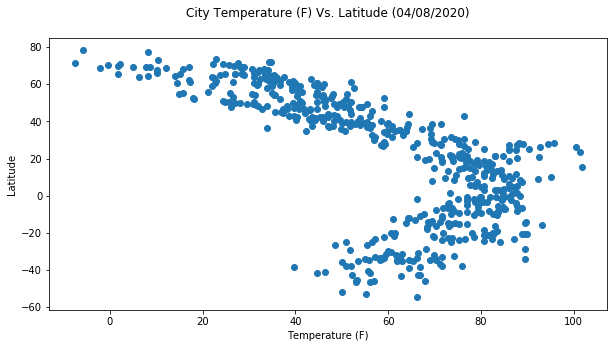

In [7]:
# create a plot canvas 
plt.figure(figsize=(10,5))

# add x,y values to it
x_values = cityWeather['Temperature (F)']
y_values = cityWeather['Latitude']

# plot it 
plt.scatter(x_values,y_values)

# label x,y axes
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')

"""
Python time method strftime() converts a tuple or struct_time representing a time as returned by gmtime() or 
localtime() to a string as specified by the format argument.
If t is not provided, the current time as returned by localtime() is used. format must be a string.
Following is the syntax for strftime() method −

time.strftime(format[, t])

"""

today = time.strftime("%m/%d/%Y")
plt.title(f"City Temperature (F) Vs. Latitude ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Temp.png')

plt.show()

The code above uses the object "plt" and calls series of methods on it to set x &  y axes values , set labels , titles and uses the obj.scatter() method to scatter plot. 

Its Pretty clear from the above plot that the temperatures are higher 10 - 20 degress N and S of Equator and then they fall gradually towards the Pole.

#### Latitude vs. Humidity Plot

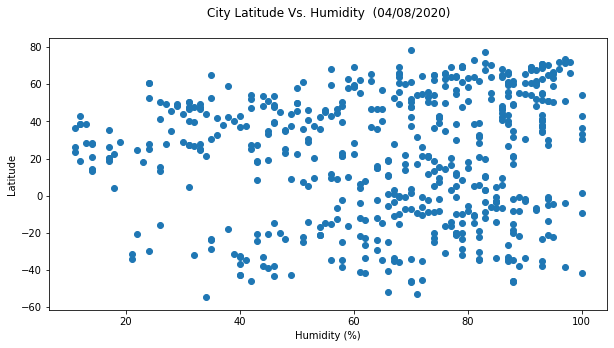

In [8]:

plt.figure(figsize=(10,5))

x_values = cityWeather['Humidity (%)']
y_values = cityWeather['Latitude']

plt.scatter(x_values,y_values)

plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude Vs. Humidity  ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Humidity.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Humidity.


#### Latitude vs. Cloudiness Plot

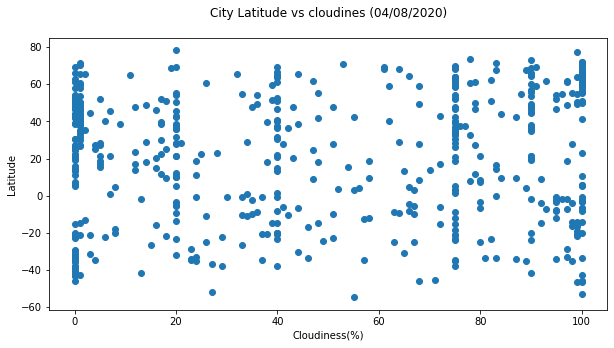

In [9]:

plt.figure(figsize=(10,5))

y_values = cityWeather['Latitude']
x_values = cityWeather['Cloudiness (%)']

plt.scatter(x_values,y_values)

plt.ylabel('Latitude')
plt.xlabel('Cloudiness(%)')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs cloudines ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Cloudiness.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Cloudiness.



#### Latitude vs. Wind Speed Plot

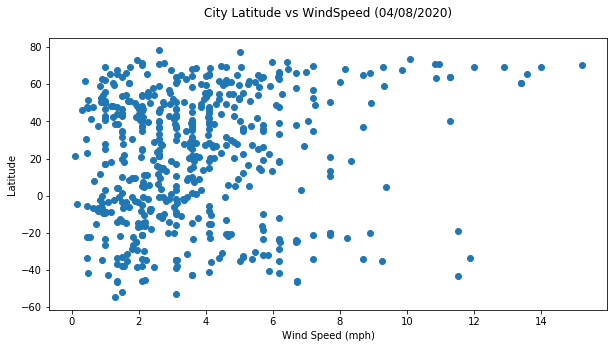

In [10]:

plt.figure(figsize=(10,5))

y_values = cityWeather['Latitude']
x_values = cityWeather['Wind Speed (mph)']

plt.scatter(x_values,y_values)

plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs WindSpeed ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.WindSpeed.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Wind Speeds.


## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames

# Extract latitudes above and below of 0 degress (Equator) to get the hemispheres
northern_hem = cityWeather.loc[pd.to_numeric(cityWeather["Latitude"]).astype(float) > 0, :]
southern_hem = cityWeather.loc[pd.to_numeric(cityWeather["Latitude"]).astype(float) < 0,:] 


####  Northern Hemisphere -  Temp vs. Latitude Linear Regression

The r-squared value is: -89.91 %


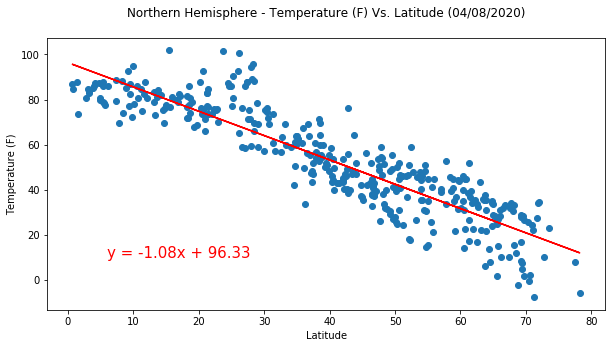

In [13]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Temperature (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Temperature (F) Vs. Latitude ({today})\n')

# save the plot and display
plt.savefig('Regression_Northern_Temp_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.



####  Southern Hemisphere -  Temp vs. Latitude Linear Regression

Line Equation : y = 0.56x + 83.15
The r-squared value is: 66.17 %


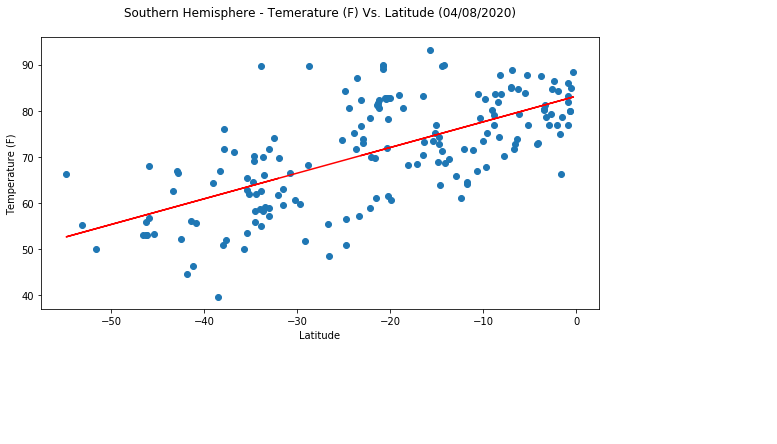

In [14]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Temperature (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Temerature (F) Vs. Latitude ({today})\n')

# save the plot and display
plt.savefig('Regression_Southern_Temp_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 28.78 %


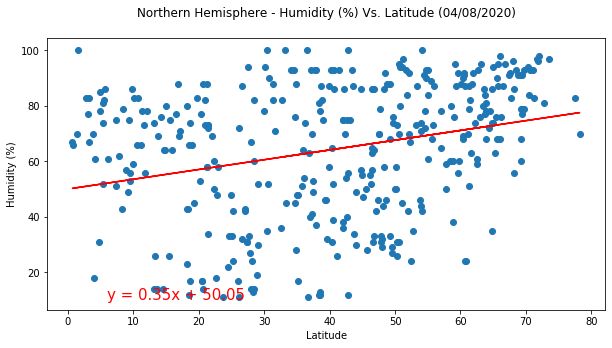

In [15]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Humidity (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Humidity (%) Vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_Humidity_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Line Equation : y = 0.4x + 77.74
The r-squared value is: 29.77 %


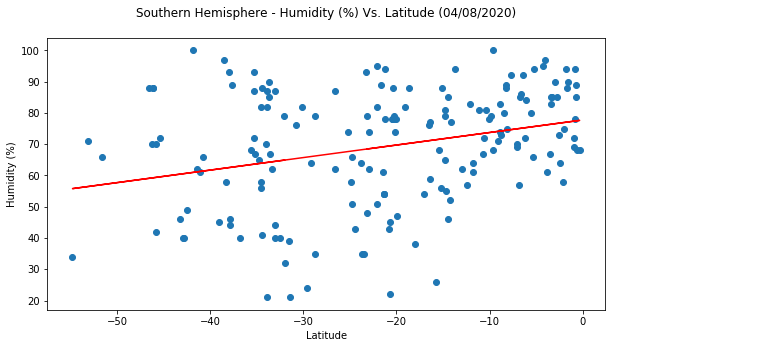

In [16]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Humidity (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title(f'Southern Hemisphere - Humidity (%) Vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_Humidity_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 22.86 %


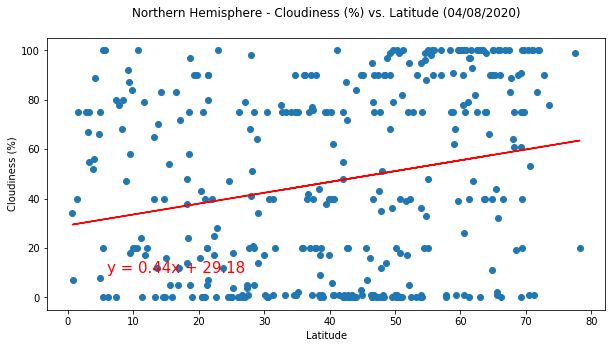

In [17]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Cloudiness (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_Cloudiness_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()


The regression does not show
much correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Line Equation : y = 0.62x + 65.31
The r-squared is: 23.57 %


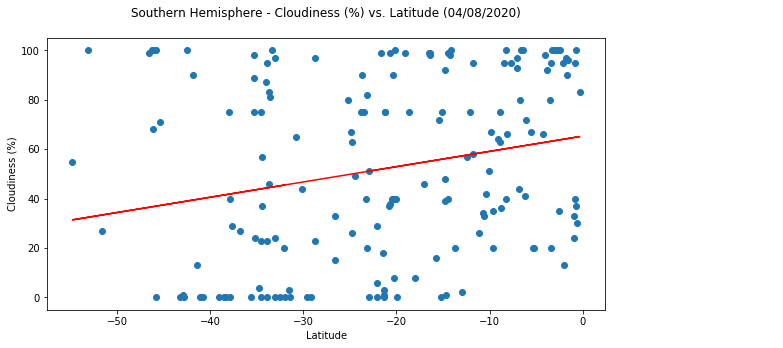

In [18]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Cloudiness (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_Cloudiness_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much of a correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 23.4 %


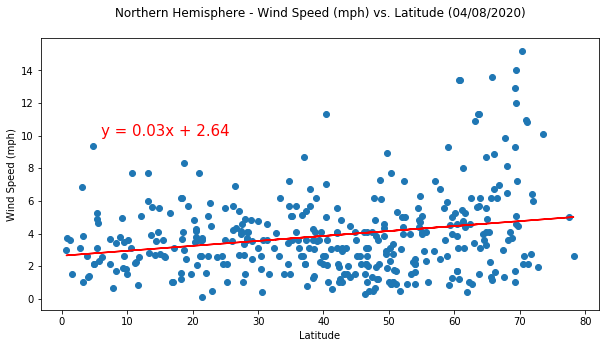

In [19]:
plt.figure(figsize=(10,5))


x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Wind Speed (mph)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_WindSpeed_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()


The regression does not display much of a correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Line Equation : y = -0.04x + 2.5
The r-squared is: -24.68 %


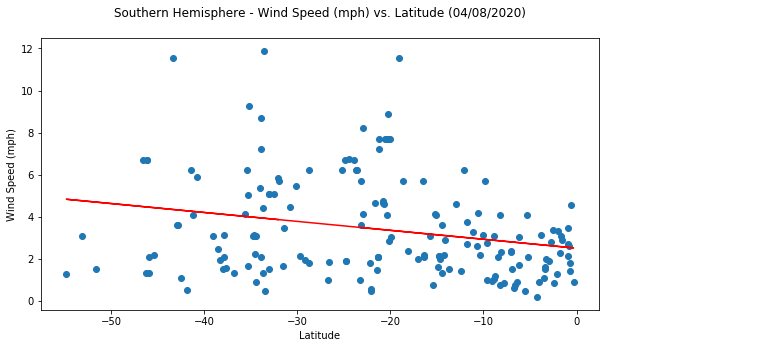

In [20]:
plt.figure(figsize=(10,5))


x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Wind Speed (mph)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_WindSpeed_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much of a correlation.